In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import nltk
import prince
import re
import string

In [3]:
import io
import keras

In [4]:
#for NLP
import spacy
import nltk.tokenize
punc = string.punctuation
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from string import punctuation
from os import listdir
from numpy import array

In [6]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text  import CountVectorizer

In [7]:
from string import punctuation

In [8]:
df = pd.read_csv(r'D:\NuVision\Sentiment Analysis\Dataset\mental_health.csv')

In [9]:
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


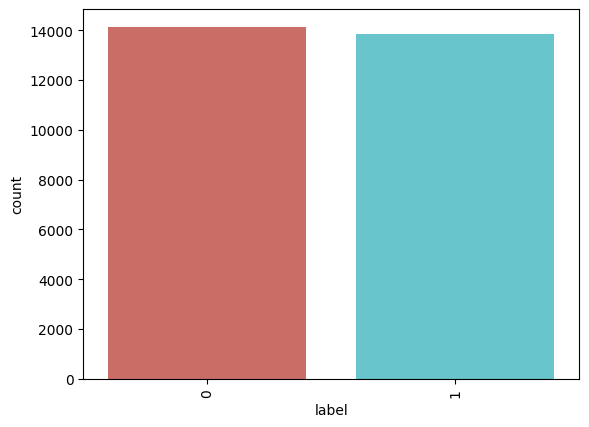

In [11]:
sns.countplot(x=df['label'],data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

In [12]:
df = shuffle(df)
N = df.sample(frac=0.22, replace=False, random_state=1)
N

,text,label
3560,mg xanax thinking taking all know im even po...,1
7925,coronavirus good anything least good topic sma...,0
26632,doin hope people great especially ladies there...,0
5294,broke system really wanting pushups day muste...,0
20169,know what new ui bad,0
...,...,...
10484,feel like antidepressants working im lazyi tak...,1
13719,im confusedso ive reading posts lot seem quite...,1
21,bruh wish dumb years ago ignorance bliss im a...,0
20207,infinite values twice many infinite values ...,0


In [13]:
text = list(df['text'])
labels = list(df['label'])

training_text = text[0:15000]
testing_text = text[15000:]

training_labels = labels[0:15000]
testing_labels = labels[15000:]

In [15]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_text)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_text)
testing_sequences = tokenizer.texts_to_sequences(testing_text)
training_padded = pad_sequences(training_sequences, maxlen=120, padding='post',truncating='post')
testing_padded = pad_sequences(testing_sequences, maxlen=120, padding='post',truncating='post')

In [16]:
training_padded = np.array(training_padded)
testing_labels= np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)